# Computing spatial heterogeneity scores with SHouT

## Import packages and load example datasets

In [22]:
import squidpy as sq
import seaborn as sns
import shout
import pandas as pd
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt

In [3]:
mibitof = sq.datasets.mibitof()
seqfish = sq.datasets.seqfish()

## Compute and visualize scores for MIBI-TOF data

In [4]:
%%time
shout.all_scores(mibitof, cluster_key='Cluster', radius=2)

CPU times: user 9.92 s, sys: 89.5 ms, total: 10 s
Wall time: 10 s


/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


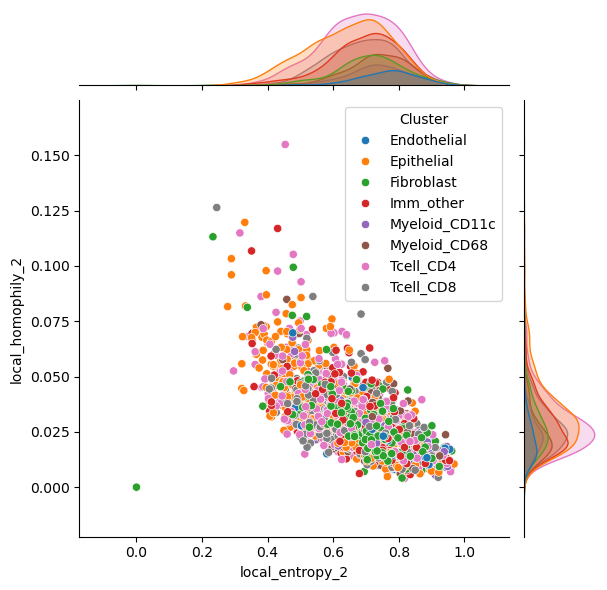

In [6]:
sns.jointplot(data=mibitof.obs, x='local_entropy_2', y='local_homophily_2', hue='Cluster')

- These results show that helper T cells (Th) and epithelial cells (Ep) are the most abundant in the MIBI TOF dataset.

- Additionally, it also shows that endothelial cells have the highest local entropy score and local homophily score, whereas Th and Ep cells are most abundant at a lower score for both local entropy as well as local homophily. Moreover, for all cell types, the distribution matches for local homophily and local entropy scores, therefore suggesting that cell types that are likely to contain the most information are also the most diversely connected.

/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


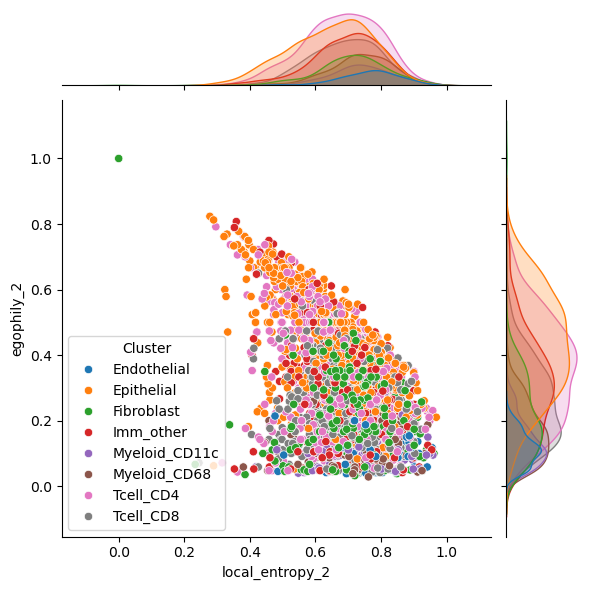

In [ ]:
sns.jointplot(data=mibitof.obs, x='local_entropy_2', y='egophily_2', hue='Cluster')

/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


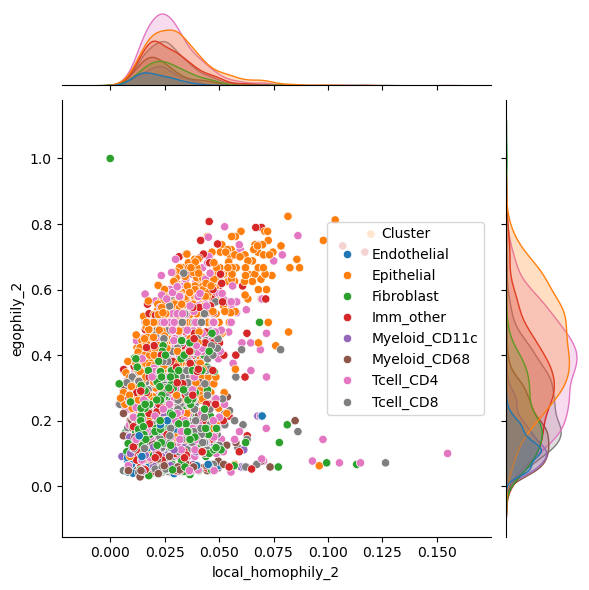

In [ ]:
sns.jointplot(data=mibitof.obs, x='local_homophily_2', y='egophily_2', hue='Cluster')

- The results suggest that all cell types except endothelial cells (End) and myeloid dendritic cells (Md), i.e., Ep, fibroblasts (Fib), immune cells (Imm), CD68+ macrophages (Mac), Th and cytotoxic T cells (Tc), have a pretty uniform distribution of egophily--meaning they appear both in the presence of other cell types, as well as in clusters of similar celltypes. This can be explained by the articulate but well spread-out patterns of Ep, Th and Fib cells.

## Compute and visualize scores for seqFISH data

In [ ]:
%%time
scores_seqfish = shout.all_scores(seqfish, cluster_key='celltype_mapped_refined', radius=2)

CPU times: user 2min 28s, sys: 2.86 s, total: 2min 31s
Wall time: 2min 32s


/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


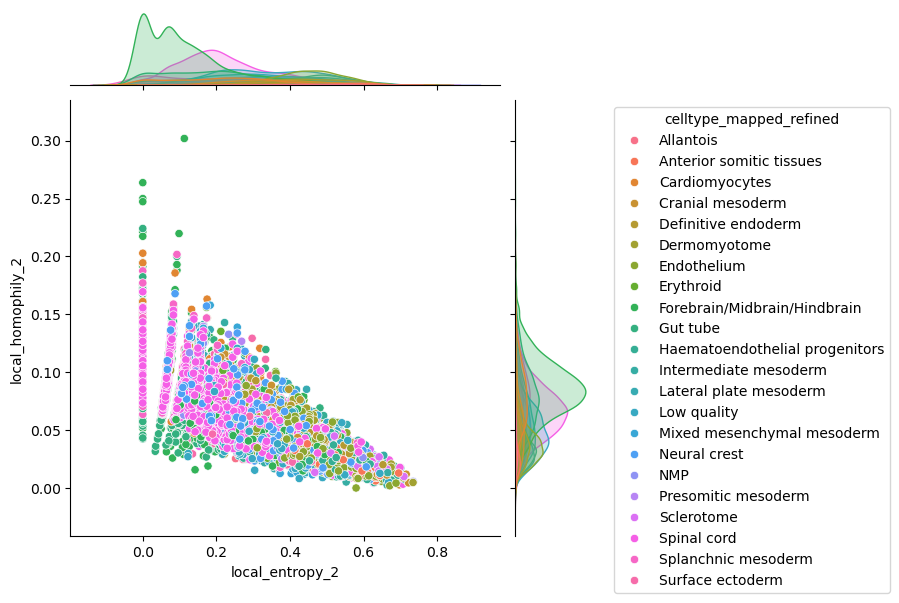

In [17]:
f = sns.jointplot(data=seqfish.obs, x='local_entropy_2', y='local_homophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


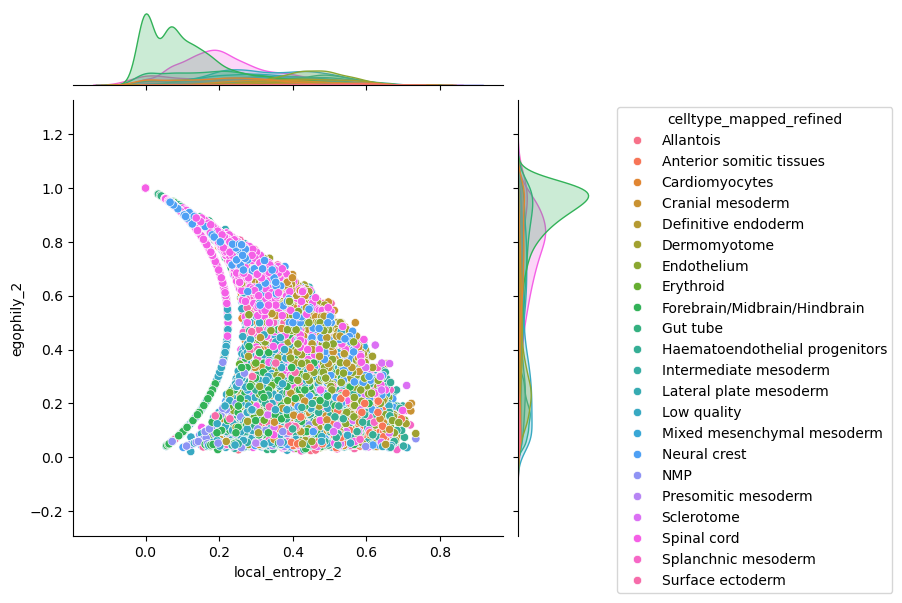

In [16]:
f = sns.jointplot(data=seqfish.obs, x='local_entropy_2', y='egophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/dbblumenthal/opt/anaconda3/envs/shout/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


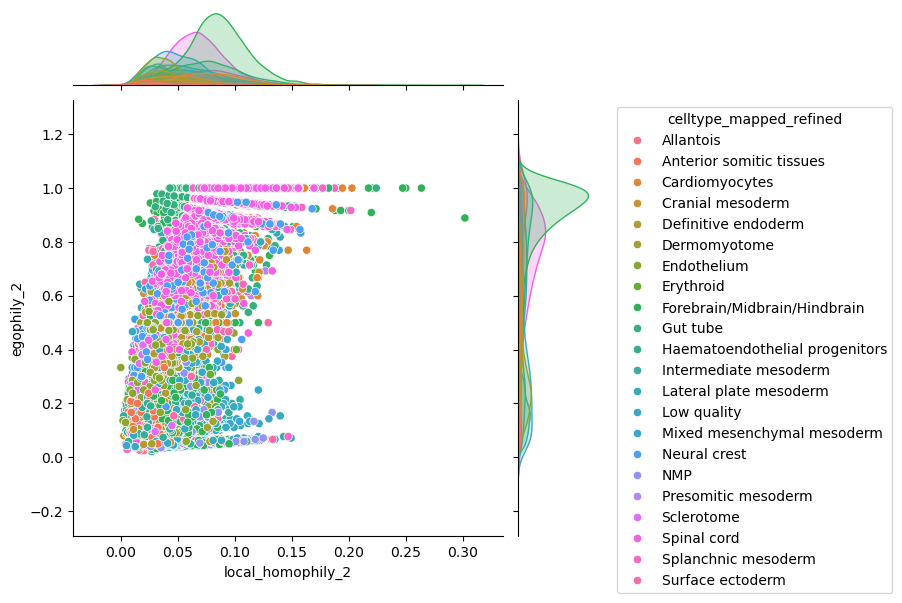

In [19]:
f = sns.jointplot(data=seqfish.obs, x='local_homophily_2', y='egophily_2', hue='celltype_mapped_refined')
sns.move_legend(f.figure.axes[0], "upper left", bbox_to_anchor=(1.25, 1))

# Robustness, scalability (runtime), other analyses

### i. Robustness

### ii. Scalability

##### A. MIBITOF data:

In [5]:
# --- Imports: ---
import time
# ---- Code: ----
runtimes={}
n=[1, 5, 10, 20, 40, 80, 100]

for _count_ in range (50):
    count=0
    for i in n:
        print('Iteration '+str(_count_+1)+', i= '+str(i))
        # ---
        start = time.time()
        scores_mibitof = shout.all_scores(mibitof, cluster_key='Cluster', radius=2)
        end = time.time()
        try:
            runtimes[i].append(end-start)
        except:
            runtimes[i]=[]
            runtimes[i].append(end-start)

Iteration 1, i= 1
Iteration 1, i= 5
Iteration 1, i= 10
Iteration 1, i= 20
Iteration 1, i= 40
Iteration 1, i= 80
Iteration 1, i= 100
Iteration 2, i= 1
Iteration 2, i= 5
Iteration 2, i= 10
Iteration 2, i= 20
Iteration 2, i= 40
Iteration 2, i= 80
Iteration 2, i= 100
Iteration 3, i= 1
Iteration 3, i= 5
Iteration 3, i= 10
Iteration 3, i= 20
Iteration 3, i= 40
Iteration 3, i= 80
Iteration 3, i= 100
Iteration 4, i= 1
Iteration 4, i= 5
Iteration 4, i= 10
Iteration 4, i= 20
Iteration 4, i= 40
Iteration 4, i= 80
Iteration 4, i= 100
Iteration 5, i= 1
Iteration 5, i= 5
Iteration 5, i= 10
Iteration 5, i= 20
Iteration 5, i= 40
Iteration 5, i= 80
Iteration 5, i= 100
Iteration 6, i= 1
Iteration 6, i= 5
Iteration 6, i= 10
Iteration 6, i= 20
Iteration 6, i= 40
Iteration 6, i= 80
Iteration 6, i= 100
Iteration 7, i= 1
Iteration 7, i= 5
Iteration 7, i= 10
Iteration 7, i= 20
Iteration 7, i= 40
Iteration 7, i= 80
Iteration 7, i= 100
Iteration 8, i= 1
Iteration 8, i= 5
Iteration 8, i= 10
Iteration 8, i= 20
It

In [27]:
runtimes_df=pd.DataFrame.from_dict(runtimes)
print(list(runtime_df.columns))
print(runtime_df.head())

[1, 5, 10, 20, 40, 80, 100]
        1          5          10         20         40         80         100
0  9.829403  10.508636  10.500782  10.429436  11.313416  11.616972  11.271674
1  9.138457   9.492545   9.291450   8.986964   9.149297   9.112489   9.013567
2  8.989046   9.050477   8.935788   8.975302   9.061326   8.973713   8.912144
3  9.124988  10.006779   9.554159   9.819364   9.768444   9.964116  10.049358
4  9.801530  10.118847  10.119798   9.821927  10.060840   9.947197   9.924900


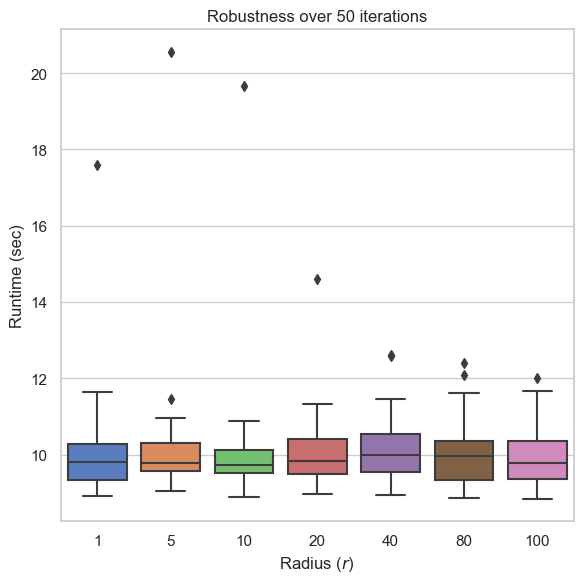

In [28]:
sns.set_theme(style="whitegrid", palette="muted")
fig, axes = plt.subplots(figsize=(6, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
df_melted=pd.melt(runtimes_df)
ax=sns.boxplot(x = 'variable', y = 'value', data = df_melted, ax=axes, orient='v')
title=f'Robustness over 50 iterations'
xlabel="Radius ($r$)"
ylabel="Runtime (sec)"
axes.set_title(title)
axes.set_xlabel(xlabel)
axes.set_ylabel(ylabel)
fig.tight_layout()
plt.savefig(f'Boxplot_Robustness_MIBITOF.pdf', format='pdf', bbox_inches='tight')
plt.show()
plt.close()

##### B. SeqFish data:

In [ ]:
runtimes={}
# n=[1, 5, 10, 20, 40, 80, 100]
n=[5, 25, 50, 75, 100]

for _count_ in range (25):
    count=0
    for i in n:
        print('Iteration '+str(_count_+1)+', i= '+str(i))
        # ---
        start = time.time()
        scores_seqfish = shout.all_scores(seqfish, cluster_key='celltype_mapped_refined', radius=2)
        end = time.time()
        try:
            runtimes[i].append(end-start)
        except:
            runtimes[i]=[]
            runtimes[i].append(end-start)
        

Iteration 1, i= 5
Iteration 1, i= 25
Iteration 1, i= 50
Iteration 1, i= 75
Iteration 1, i= 100
Iteration 2, i= 5
Iteration 2, i= 25
Iteration 2, i= 50
Iteration 2, i= 75
Iteration 2, i= 100
Iteration 3, i= 5
Iteration 3, i= 25
Iteration 3, i= 50
Iteration 3, i= 75
Iteration 3, i= 100
Iteration 4, i= 5
Iteration 4, i= 25
Iteration 4, i= 50
Iteration 4, i= 75
Iteration 4, i= 100
Iteration 5, i= 5
Iteration 5, i= 25
Iteration 5, i= 50
Iteration 5, i= 75
Iteration 5, i= 100
Iteration 6, i= 5
Iteration 6, i= 25
Iteration 6, i= 50
Iteration 6, i= 75
Iteration 6, i= 100
Iteration 7, i= 5
Iteration 7, i= 25
Iteration 7, i= 50
Iteration 7, i= 75
Iteration 7, i= 100
Iteration 8, i= 5
Iteration 8, i= 25
Iteration 8, i= 50
Iteration 8, i= 75
Iteration 8, i= 100
Iteration 9, i= 5
Iteration 9, i= 25
Iteration 9, i= 50
Iteration 9, i= 75
Iteration 9, i= 100
Iteration 10, i= 5
Iteration 10, i= 25
Iteration 10, i= 50
Iteration 10, i= 75
Iteration 10, i= 100
Iteration 11, i= 5
Iteration 11, i= 25
Iterat

### iii. Other analyses